In [2]:
# # to clone the github project 
!git clone https://github.com/nesl/RadHAR.git
# # to mount the google drive 
from google.colab import drive
drive.mount('/content/drive')
# !pip install open3d
# !pip install pptk
# !pip install laspy
# !pip install pillow



Cloning into 'RadHAR'...
remote: Enumerating objects: 250, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 250 (delta 0), reused 0 (delta 0), pack-reused 247
Receiving objects: 100% (250/250), 91.97 MiB | 12.02 MiB/s, done.
Resolving deltas: 100% (207/207), done.
Checking out files: 100% (218/218), done.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['boxing']
/content/RadHAR/Data/Test/boxing/__20_boxing_6.txt
boxing


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:272: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:273: DeprecationWarning: `np.float` is a deprecated alias f

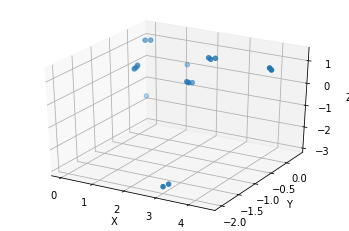

before dbscan


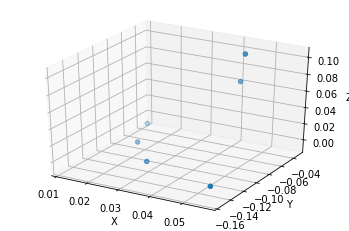

after dbscan


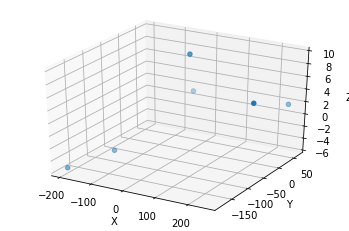

after rotation  30


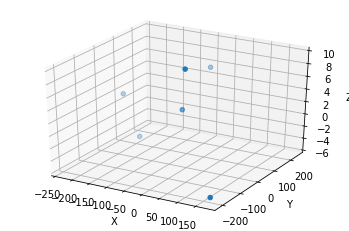

after rotation  60


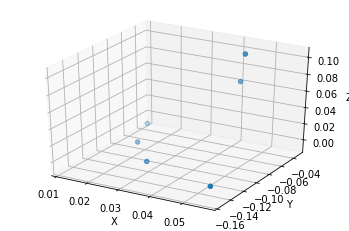

after enhanced voxelization 


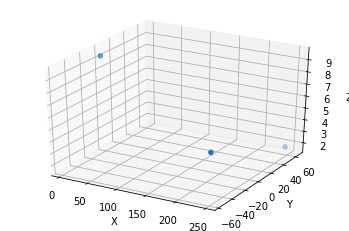

after enhanced voxelization 


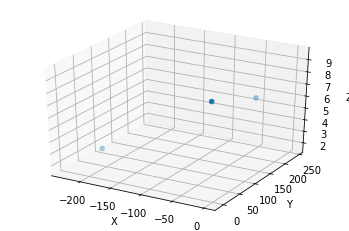

after enhanced voxelization 


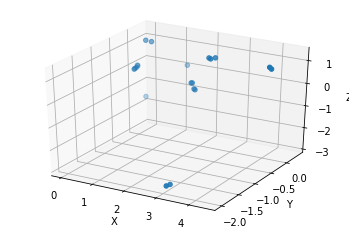

before dbscan


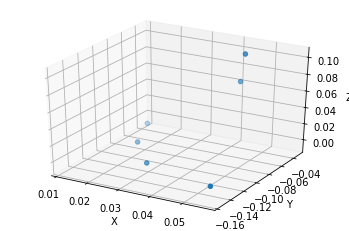

after dbscan


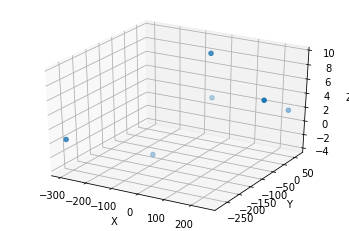

after rotation  30


KeyboardInterrupt: ignored

In [3]:
"""
Extract the VOXEL representation from the point cloud dataset

USAGE: change the parent_dir and extract_path to the correct variables.

- parent_dir is raw Path_to_training_or_test_data.
- extract_path is the Path_to_put_extracted_data samples.

EXAMPLE: SPECIFICATION

parent_dir = '/Users/sandeep/Research/Ti-mmWave/data/Temp_Samples/Train/'
sub_dirs=['boxing','jack','jump','squats','walk']
extract_path = '/Users/sandeep/Research/Ti-mmWave/data/extract/Train_Data_voxels_'
"""

parent_dir = '/content/RadHAR/Data/Test'
sub_dirs=['boxing','jack','jump','squats','walk']
extract_path = '/content/drive/MyDrive/RESEARCH PROJECT DOCUMENTS./Signal Processing/data generated '

import glob
import os
import numpy as np
import csv
import time
import time
import random
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# xs = 

# ys = 

# zs = 

# fig = plt.figure()

# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(xs,ys,zs)

# plt.show()



# fig = plt.figure(figsize=(4,4))

# ax = fig.add_subplot(111, projection='3d')
# fig = plt.figure(figsize=(4,4))

# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(2,3,4) # plot the point (2,3,4) on the figure

# plt.show()

"""   SIGNAL PROCESSING METHIODS WHICH HAVE BEEN IMPLEMENTED BY ME SO FAR.

      dbsccanbyme(frame of form [ x,y,z , intensity , velocity] # frame form [0.01171875, -0.0390625, -0.0078125, 0.0, 30.7298469543] , radius of the neighbourhood of the point , minimum points in the radius of the neighbourhood)
      myvoxel([x , y , z , 0.0 , velociaty])
      myrotation(frame of form [ x,y,z , intensity , velocity] , array of angles)
"""


def visualize(finalframepoints):
          xaxis = []
          yaxis = []
          zaxis = []
          for i in finalframepoints:
              xaxis.append(i[0])
              yaxis.append(i[1])
              zaxis.append(i[2])
      

          xs = xaxis
          ys = yaxis
          zs = zaxis

          fig = plt.figure()
         

          ax = fig.add_subplot(111, projection='3d')

          ax.scatter(xs,ys,zs)
          ax.set_xlabel("X")

          ax.set_ylabel("Y")

          ax.set_zlabel("Z")
          plt.show()


def dbscanbyme(frame , radiusOfNeighnbourhood , minpts):
    # frame form [0.01171875, -0.0390625, -0.0078125, 0.0, 30.7298469543]
    centeroids = []
    pointsinframe = []
    for i in frame:
      xc = i[0]
      yc = i[1]
      zc = i[2]   
      velocity = i[3]
      intensity = i[4]
      pointsinframe.append([xc,yc,zc,velocity,intensity]) 
    noofpoints = len(pointsinframe)
    allpointswhoseneighbours = []
    for point0 in pointsinframe:
      neighbour = []
      pointwhoseneighbour = [point0]   
      for point1 in pointsinframe:
        dist = (((point1[0]) - (point0[0])) * ((point1[0]) - (point0[0]))) + (((point1[1]) - (point0[1])) * ((point1[1]) - (point0[1]))) + 0.25 * (((point1[2]) - (point0[2])) * ((point1[2]) - (point0[2])))
        isneighbour = False
        if (dist < radiusOfNeighnbourhood):
          isneighbour = True
          if isneighbour == True:
            neighbour.append(point1)
      pointwhoseneighbour.append(neighbour)
      allpointswhoseneighbours.append(pointwhoseneighbour)
    h = allpointswhoseneighbours
    for x in h:
      if (len(x[1]) >= minpts):
        centeroids.append(x)
    return allpointswhoseneighbours , centeroids

def myvoxel(x,y,z,a,velocity):
    points = []
    pointsfinal = []
    for i in range(len(x)):
       points.append([x[i] , y[i] , z[i] , a[i] , velocity[i]])
    pointsfinal = points
    for i in points:
      if ((i[0] < -3) or i[1] < -3 or i[2] < -1.25 or i[0] >3 or i[1] > 3 or i[2] > 1.25):
        for j in pointsfinal:
          if j == i:               
            pointsfinal.remove(j)
            # print("done")
    # print(pointsfinal[0])
    return pointsfinal
    
def myrotation(frame , angle):
  # frame form [0.01171875, -0.0390625, -0.0078125, 0.0, 30.7298469543]
  sphericalcoordinates = []
  cartesianframes = []
  finalframe = []
  for i in range(len(frame)):
    r = math.sqrt((frame[i][0]*frame[i][0]) + (frame[i][1] * frame[i][1]) + (frame[i][2] * frame[i][2]))
    theta = math.degrees(math.acos(frame[i][2] / r))
    theta1 = math.degrees(math.atan(frame[i][1] / frame[i][0]))
    sphericalcoordinates.append([r , theta , theta1])
    xcoordinate = (r * math.degrees(math.sin(theta)) * math.degrees(math.cos(theta1 + (angle * theta1)))) + (angle * frame[i][0])
    ycoordinate = (r * math.degrees(math.sin(theta)) * math.degrees(math.sin(theta1 + (angle * theta1)))) + (angle * frame[i][1])
    zcoordinate = r * math.degrees(math.cos(theta))
    cartesianframes.append([ xcoordinate , ycoordinate , zcoordinate  , 0.0 ,  frame[i][4]])
  return sphericalcoordinates , cartesianframes 

def voxalize(x_points, y_points, z_points, x, y, z, velocity): 

    x_min = np.min(x)
    x_max = np.max(x)

    y_min = np.min(y)
    y_max = np.max(y)

    z_max = np.max(z)
    z_min = np.min(z)

    z_res = (z_max - z_min)/z_points
    y_res = (y_max - y_min)/y_points
    x_res = (x_max - x_min)/x_points


    pixel = np.zeros([x_points,y_points,z_points])

    x_current = x_min
    y_current = y_min
    z_current = z_min

    x_prev = x_min
    y_prev = y_min
    z_prev = z_min


    x_count = 0
    y_count = 0
    z_count = 0
    start_time = time.time()


    for i in range(y.shape[0]):
        x_current = x_min
        x_prev = x_min
        x_count = 0
        done=False

        while x_current <= x_max and x_count < x_points and done==False:
            y_prev = y_min
            y_current = y_min
            y_count = 0
            while y_current <= y_max and y_count < y_points and done==False:
                z_prev = z_min
                z_current = z_min
                z_count = 0
                while z_current <= z_max and z_count < z_points and done==False:
                    if x[i] < x_current and y[i] < y_current and z[i] < z_current and x[i] >= x_prev and y[i] >= y_prev and z[i] >= z_prev:
                        pixel[x_count,y_count,z_count] = pixel[x_count,y_count,z_count] + 1
                        done = True

                        #velocity_voxel[x_count,y_count,z_count] = velocity_voxel[x_count,y_count,z_count] + velocity[i]
                    z_prev = z_current
                    z_current = z_current + z_res
                    z_count = z_count + 1
                y_prev = y_current
                y_current = y_current + y_res
                y_count = y_count + 1
            x_prev = x_current
            x_current = x_current + x_res
            x_count = x_count + 1
    # print(pixel)
    return pixel


  
def get_data(file_path):
    with open(file_path) as f:
        lines = f.readlines()
    frame_num_count = -1
    frame_num = []
    x = []
    y = []
    z = []
    velocity = []
    intensity = []
    wordlist = []

    for x1 in lines:
        for word in x1.split():
            wordlist.append(word)

    length1 = len(wordlist)

    for i in range(0,length1):
        if wordlist[i] == "point_id:" and wordlist[i+1] == "0":
            frame_num_count += 1
        if wordlist[i] == "point_id:":
            frame_num.append(frame_num_count)
        if wordlist[i] == "x:":
            x.append(wordlist[i+1])
        if wordlist[i] == "y:":
            y.append(wordlist[i+1])
        if wordlist[i] == "z:":
            z.append(wordlist[i+1])
        if wordlist[i] == "velocity:":
            velocity.append(wordlist[i+1])
        if wordlist[i] == "intensity:":
            intensity.append(wordlist[i+1])

    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)
    frame_num = np.asarray(frame_num)
    velocity = np.asarray(velocity)
    intensity = np.asarray(intensity)

    x = x.astype(np.float)
    y = y.astype(np.float)
    z = z.astype(np.float)
    velocity = velocity.astype(np.float)
    intensity = intensity.astype(np.float)
    frame_num = frame_num.astype(np.int)

    data = dict()
  
    for i in range(len(frame_num)):
        if int(frame_num[i]) in data:
            data[frame_num[i]].append([x[i],y[i],z[i],velocity[i],intensity[i]])
    
        else:
            data[frame_num[i]]=[]
            data[frame_num[i]].append([x[i],y[i],z[i],velocity[i],intensity[i]])
    data_pro1 = dict()

    # Merging of frames together with sliding of  frames
    together_frames = 1
    sliding_frames = 1

    #we have frames in data
    frames_number = []
    for i in data:
        frames_number.append(i)

    frames_number=np.array(frames_number)
    total_frames = frames_number.max()

    i = 0
    j = 0

    while together_frames+i < total_frames:

        curr_j_data =[]
        for k in range(together_frames):
            curr_j_data = curr_j_data + data[i+k]
        #print(len(curr_j_data))
        data_pro1[j] = curr_j_data
        j = j+1
        i = i+sliding_frames

    pixels = []

    # Now for 2 second windows, we need to club together the frames and we will have some sliding windows
    j = []
    for i in data_pro1:
        
        feedarray = []
        f = data_pro1[i]
        f = np.array(f)

# RUNNING DBSCANBYME (DATA PREPROCESSING : STEP # 1)
        k = dbscanbyme(f , 0.1 , 5)
        a = k[0]
        b = k[1]
        voxpart = []
        for l in b:
          voxpart.append(l[0])
        visualize(f)
        print("before dbscan")
        visualize(voxpart)
        print("after dbscan")
# RUNNING MYROTATION (DATA PREPROCESSING : STEP # 2)
        angles = [30 , 60]
        datas = []
        datas.append(voxpart)
        for i in angles:
          k = myrotation(voxpart , i)
      
          u = k[1]
          datas.append(u)
          visualize(u)
          print("after rotation " , i)

       
# RUNNING MYVOXEL (DATA PREPROCESSING : STEP # 3)
        for y in datas:
          
          xv = []
          yv = []
          zv = []
          a = []
          velocity = []
          for o in y:
          
            xv.append(o[0])
            yv.append(o[1])
            zv.append(o[2])
            a.append(o[3])
            velocity.append(o[4])
           
          finalframepoints = myvoxel(xv , yv , zv,a,velocity)
          visualize(finalframepoints)
          print("after enhanced voxelization ")
          finalframepoints = np.array(finalframepoints)

          x_c = finalframepoints[:,0]
          y_c = finalframepoints[:,1]
          z_c = finalframepoints[:,2]
          vel_c=finalframepoints[:,3]
                
            #   # x_c = f[:,0]
            #   # y_c = f[:,1]
            #   # z_c = f[:,2]
            #   # vel_c=f[:,3]

            # voxpart = np.array(voxpart)
            # x_c = voxpart[:,0]
            # y_c = voxpart[:,1]
            # z_c = voxpart[:,2]
            # vel_c=voxpart[:,3]


          pix = voxalize(10, 32, 32, x_c, y_c, z_c, vel_c)
          pixels.append(pix)


    pixels = np.array(pixels)

    frames_together = 60
    sliding = 10

    train_data=[]

    i = 0
    while i+frames_together<=pixels.shape[0]:
        local_data=[]
        for j in range(frames_together):
            local_data.append(pixels[i+j])

        train_data.append(local_data)
        i = i + sliding

    train_data = np.array(train_data)

    del x,y,z, velocity, data, data_pro1, pixels

    return train_data

# parse the data file


def parse_RF_files(parent_dir, sub_dirs, file_ext='*.txt'):
    print(sub_dirs)
    features =np.empty((0, 60, 10, 32, 32) )
    labels = []

    for sub_dir in sub_dirs:
        files=sorted(glob.glob(os.path.join(parent_dir,sub_dir, file_ext)))
        for fn in files:
            print(fn)
            print(sub_dir)
            train_data = get_data(fn)
            features=np.vstack([features,train_data])


            for i in range(train_data.shape[0]):
                labels.append(sub_dir)
            print(features.shape,len(labels))

            del train_data

    return features, labels


for sub_dir in sub_dirs:
    features, labels = parse_RF_files(parent_dir,[sub_dir])
    Data_path = extract_path + sub_dir
    np.savez(Data_path, features,labels)
    del features,labels


In [ ]:
"""
Time-Distributed CNN + Bidirectional LSTMS on VOXELS

- extract_path is the where the extracted data samples are available.
- checkpoint_model_path is the path where to checkpoint the trained models during the training process


EXAMPLE: SPECIFICATION

extract_path = '/Users/sandeep/Research/Ti-mmWave/data/extract/Train_Data_voxels_'
checkpoint_model_path="/Users/sandeep/Research/Ti-mmWave/data/extract/TD_CNN_LSTM"

"""


extract_path = '/content/drive/MyDrive/RESEARCH PROJECT DOCUMENTS./Untitled folder/Released_Data_And_Models/Train_Data_voxels_'
checkpoint_model_path="/content/RadHAR/Data/Test"


import glob
import os
import numpy as np
# random seed.
rand_seed = 1
from numpy.random import seed
seed(rand_seed)
import tensorflow
tensorflow.random.set_seed(rand_seed)
# from tensorflow import set_random_seed
# set_random_seed(rand_seed)
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Activation
from keras.layers.core import Permute, Reshape
from keras import backend as K

from keras import optimizers
from tensorflow.python.keras.optimizer_v1 import SGD
# from keras.optimizers import SGD
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
# from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Bidirectional,TimeDistributed
from sklearn.model_selection import train_test_split
from keras.models import load_model




sub_dirs=['boxing']
# ,'jack','jump','squats','walk']

def one_hot_encoding(y_data, sub_dirs, categories=1):
                    #  categories=5):
    Mapping=dict()

    count=0
    for i in sub_dirs:
        Mapping[i]=count
        count=count+1

    y_features2=[]
    for i in range(len(y_data)):
        Type=y_data[i]
        lab=Mapping[Type]
        y_features2.append(lab)

    y_features=np.array(y_features2)
    y_features=y_features.reshape(y_features.shape[0],1)
    from tensorflow.keras.utils import to_categorical
    y_features = to_categorical(y_features)

    return y_features


def full_3D_model(input_x, input_y, reg = 0, num_feat_map = 16, summary=True):
    print('building the model ... ')
    model = Sequential()
    # 1st layer group
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv1a", input_shape=(10, 32, 32,1), padding="same", activation="relu")))
    # 2nd layer group
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv1b", padding="same", activation="relu")))

    model.add(TimeDistributed(MaxPooling3D(name="pool1", strides=(2, 2, 2), pool_size=(2, 2, 2), padding="valid")))

    # 3rd layer group
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv2a", padding="same", activation="relu")))
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv2b", padding="same", activation="relu")))
    model.add(TimeDistributed(MaxPooling3D(strides=(2, 2, 2), pool_size=(2, 2, 2), data_format="channels_first", name="pool2", padding="valid")))

    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv2a", padding="same", activation="relu")))
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv2b", padding="same", activation="relu")))
    model.add(TimeDistributed(MaxPooling3D(strides=(2, 2, 2), pool_size=(2, 2, 2), data_format="channels_first", name="pool2", padding="valid")))


    model.add(TimeDistributed(Flatten()))
    model.add(Dropout(0.5))

    model.add(Bidirectional(LSTM(16, return_sequences=True, stateful=True)))

    model.add(Dropout(0.3))

    model.add(Dense(input_y.shape[1], activation='softmax', name = 'output'))

    return model



# frame_tog = [60]
frame_tog = [2]

#loading the train data
Data_path = extract_path+'boxing'

data = np.load(Data_path+'.npz')
train_data = data['arr_0']
train_data = np.array(train_data,dtype=np.dtype(np.float32))
                      # (np.int32))
train_label = data['arr_1']

del data
print(train_data.shape,train_label.shape)

# Data_path = extract_path+'jack'
# data = np.load(Data_path+'.npz')
# train_data = np.concatenate((train_data, data['arr_0']), axis=0)
# train_label = np.concatenate((train_label, data['arr_1']), axis=0)


# del data

# #print(train_data.shape,train_label.shape)


# Data_path = extract_path+'jump'
# data = np.load(Data_path+'.npz')
# train_data = np.concatenate((train_data, data['arr_0']), axis=0)
# train_label = np.concatenate((train_label, data['arr_1']), axis=0)

# del data
# #print(train_data.shape,train_label.shape)

# Data_path = extract_path+'squats'
# data = np.load(Data_path+'.npz')
# train_data = np.concatenate((train_data, data['arr_0']), axis=0)
# train_label = np.concatenate((train_label, data['arr_1']), axis=0)

# del data
# #print(train_data.shape,train_label.shape)

# Data_path = extract_path+'walk'
# data = np.load(Data_path+'.npz')
# train_data = np.concatenate((train_data, data['arr_0']), axis=0)
# train_label = np.concatenate((train_label, data['arr_1']), axis=0)

# del data

train_label = one_hot_encoding(train_label, sub_dirs,    categories=1)
                              #  categories=5)
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1], train_data.shape[2],train_data.shape[3],train_data.shape[4],1)

print('Training Data Shape is:')
print(train_data.shape,train_label.shape)



X_train, X_val, y_train, y_val  = train_test_split(train_data, train_label, test_size=0.20, random_state=1)
del train_data,train_label


model = full_3D_model(X_train,y_train)

print("Model building is completed")


adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,
                       decay=0.0, amsgrad=False)

model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=adam,
                  metrics=['accuracy'])
# print(metrics)

checkpoint = ModelCheckpoint(checkpoint_model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]


# Training the model
learning_hist = model.fit(X_train, y_train,
                             batch_size=3,
                          epochs=1
                            #  epochs=30,
                          #    verbose=1,
                          #    shuffle=True,
                          #  validation_data=(X_val,y_val),
                          #  callbacks=callbacks_list
                          )
